In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from matplotlib.pyplot import figure
import matplotlib
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import warnings
import pickle

warnings.filterwarnings("ignore")

C:\Users\Alex\anaconda3\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


In [2]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('precision', 12);


def load_dataset(name):
    dataset = pd.read_csv(name, header=0, delimiter=',')
    return dataset


dataset = load_dataset('customerTargeting.csv')
data = dataset.values
labels = dataset.columns.values

## Dataset Analysis

In [3]:
dataset.describe()

,g1_1,g1_2,g1_3,g1_4,g1_5,g1_6,g1_7,g1_8,g1_9,g1_10,...,c_20,c_21,c_22,c_23,c_24,c_25,c_26,c_27,c_28,target
count,6620.00000,6620.00000,6620.00000,6620.00000,6620.00000,6620.00000,6620.00000,6620.00000,6620.00000,6620.00000,...,6620.00000,6620.00000,6620.00000,6620.00000,6620.00000,6620.00000,6620.00000,6620.00000,6620.00000,6620.00000
mean,2.70878,14.42402,10.48565,24.90967,10.98807,13.41208,10.16103,10.74547,14.16903,3.25106,...,-0.02931,-0.00672,-0.00415,0.00883,0.00000,-0.22843,-0.10373,0.00041,1.91713,1.03172
std,1.85772,10.70079,8.38420,18.17495,5.63598,10.09003,7.49504,7.96425,9.86673,8.48121,...,1.22075,1.06820,0.66324,0.68342,0.32287,3.39090,1.94442,0.09276,0.30218,0.73104
min,1.05000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,-27.00000,...,-4.68411,-4.31983,-2.51292,-3.11884,-2.00000,-15.20274,-9.18172,-0.75000,0.00000,0.00000
25%,1.66700,6.00000,4.00000,10.00000,6.00000,5.00000,4.00000,4.00000,6.00000,-2.00000,...,-0.71641,-0.53122,-0.44041,-0.40681,0.00000,-2.22223,-1.29347,-0.05433,1.71000,0.00000
50%,2.15000,13.00000,9.00000,22.00000,11.00000,12.00000,9.00000,9.00000,13.00000,1.00000,...,0.00000,0.00000,0.00000,0.00107,0.00000,-0.11938,-0.01249,0.00000,1.85000,1.00000
75%,2.80000,21.00000,15.00000,36.00000,16.00000,20.00000,15.00000,16.00000,21.00000,7.00000,...,0.65463,0.49050,0.41091,0.45010,0.00000,1.80933,1.03523,0.05483,2.02000,2.00000
max,23.00000,52.00000,47.00000,94.00000,20.00000,61.00000,43.00000,48.00000,52.00000,48.00000,...,4.82114,4.39628,2.98714,2.83055,2.00000,12.56270,8.20958,0.66667,4.33000,2.00000


In [4]:
dataset.head()

,g1_1,g1_2,g1_3,g1_4,g1_5,g1_6,g1_7,g1_8,g1_9,g1_10,...,c_20,c_21,c_22,c_23,c_24,c_25,c_26,c_27,c_28,target
0,4.50000,1,3,4,5,1,1,4,6,0,...,-0.38370,-0.06545,0.58400,0.48800,0,-3.23200,-1.94400,-0.00794,1.76000,2
1,2.20000,24,22,46,10,24,28,18,22,-4,...,-0.34684,-0.15974,-0.94761,0.46354,0,-5.34217,-1.32135,0.18106,1.85000,1
2,12.00000,7,4,11,18,8,11,2,10,-3,...,-2.67393,-1.59230,0.52530,-0.46717,0,-6.56652,-4.17640,-0.04028,2.05000,2
3,1.91000,8,5,13,14,6,7,6,9,-1,...,0.61603,0.40494,-1.50692,0.74196,0,-2.43812,-0.78713,-0.01210,1.82000,0
4,2.50000,23,16,39,14,33,25,18,27,8,...,-1.05721,-1.15929,0.75101,-0.18205,0,-1.25973,0.05957,0.04261,1.99000,2


In [5]:
y = data[:, 70]
len(y)

6620

In [6]:
X = data[:, [i for i in range(69)]]
len(X)

6620

<AxesSubplot:xlabel='target', ylabel='count'>

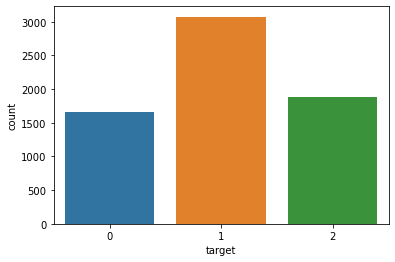

In [7]:
sns.countplot(dataset['target'])

<AxesSubplot:>

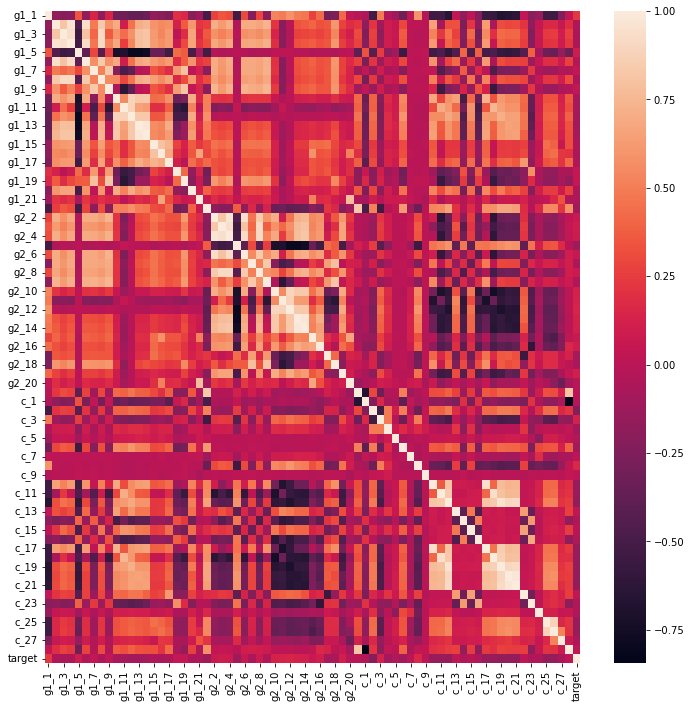

In [8]:
corr = dataset.corr()
figure(num=None, figsize=(12, 12))

sns.heatmap(corr)

In [9]:
corr_target = corr['target']
corr_target

g1_1      0.23235
g1_2     -0.04270
g1_3     -0.06241
g1_4     -0.05393
g1_5      0.08791
           ...   
c_25     -0.14781
c_26     -0.14923
c_27     -0.06214
c_28      0.02135
target    1.00000
Name: target, Length: 71, dtype: float64

In [10]:
#Variable list with correlation to target higher than a threshold
threshold = 0.13
for i in range(70):
    if corr_target[i] <-threshold or corr_target[i] >threshold:
        print(str(dataset.columns.values[i]) + " variable nº "+str(i)+ " --->  " + str(corr_target[i]))
        

g1_1 variable nº 0 --->  0.23234998298116402
g2_12 variable nº 32 --->  0.1444494516419163
c_2 variable nº 43 --->  -0.2193705322455647
c_8 variable nº 49 --->  0.1623622633170268
c_10 variable nº 51 --->  -0.14252631261891102
c_11 variable nº 52 --->  -0.13278657221053797
c_12 variable nº 53 --->  -0.1671398508042021
c_17 variable nº 58 --->  -0.14114322953729388
c_18 variable nº 59 --->  -0.13966477347227788
c_19 variable nº 60 --->  -0.16422370856431018
c_20 variable nº 61 --->  -0.16283372001064464
c_21 variable nº 62 --->  -0.15716332153873439
c_25 variable nº 66 --->  -0.14781332510114145
c_26 variable nº 67 --->  -0.14923256464569457


## Preprocessing

In [11]:
#PCA, fem una copia de els atributs per a fer pca
pcaX = X
pcaX

array([[ 4.50000000e+00,  1.00000000e+00,  3.00000000e+00, ...,
        -3.23200000e+00, -1.94400000e+00, -7.94352044e-03],
       [ 2.20000000e+00,  2.40000000e+01,  2.20000000e+01, ...,
        -5.34217368e+00, -1.32135450e+00,  1.81063922e-01],
       [ 1.20000000e+01,  7.00000000e+00,  4.00000000e+00, ...,
        -6.56652100e+00, -4.17640335e+00, -4.02769281e-02],
       ...,
       [ 2.50000000e+00,  5.00000000e+00,  8.00000000e+00, ...,
         1.74344441e+00,  1.15972509e+00,  1.91948723e-02],
       [ 1.80000000e+00,  5.00000000e+00,  4.00000000e+00, ...,
         1.95916800e+00,  1.39641600e+00,  7.11798746e-02],
       [ 1.95000000e+00,  3.50000000e+01,  3.70000000e+01, ...,
        -3.36965072e+00, -4.92462849e-01,  4.25231278e-02]])

In [12]:
pca = PCA()
pca.fit(pcaX)
pca_data = pca.transform(pcaX)
per_var = pca.explained_variance_ratio_*100 
cumulative_sum = np.cumsum(per_var)

In [13]:
cumulative_sum

array([ 40.58060485,  76.00490022,  89.12409619,  91.84085198,
        93.56986026,  94.72502376,  95.72022063,  96.51322355,
        97.07658297,  97.62606317,  98.03998547,  98.38953168,
        98.70060142,  98.94405271,  99.1717079 ,  99.376144  ,
        99.54786856,  99.69940079,  99.80045925,  99.85014789,
        99.88904337,  99.92393842,  99.94568227,  99.95739638,
        99.96554566,  99.97184245,  99.97637602,  99.98041544,
        99.98418322,  99.98740058,  99.99032549,  99.99260462,
        99.99478206,  99.99673691,  99.99790655,  99.99842093,
        99.99882661,  99.99910082,  99.99932818,  99.99954189,
        99.99970953,  99.99981132,  99.99990674, 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.  

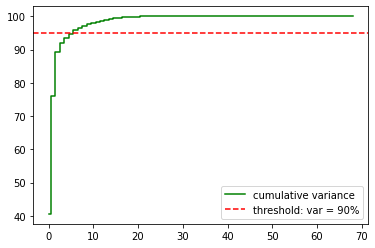

In [14]:
#Plot of % of cumulative variance by number of variables, by the numbers on the previous
#cell we can see that we can attain a 95% of cumulative variance with only 7 atributes.

plt.step(range(0,len(cumulative_sum)), cumulative_sum, where='mid', color="green",label='cumulative variance')
plt.axhline(y=95, color='red', linestyle='--',label='threshold: var = 90%')
plt.legend() 
plt.show()

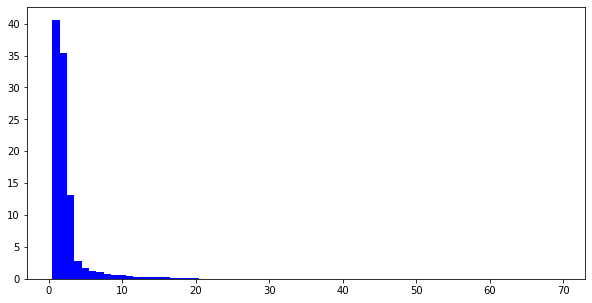

In [15]:
#Plot of % of explained variance
plt.figure(figsize=(10,5))
#sns.stripplot(x=xs, y=per_var)
plt.bar(x=range(1, len(per_var)+1), height=per_var, width=1, color="blue", linewidth=0.5)
plt.show()

In [16]:
labels = ['PC'+str(i) for i in range(1, 8)]
pca_variables = pd.DataFrame(pca_data[:,:7], columns=labels)
pca_variables

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-5.90273,-43.11757,-13.58131,6.83703,-2.85664,-3.98388,-4.76238
1,-14.93590,43.07816,17.14840,-5.70284,-13.31668,-9.58449,8.78940
2,-61.61500,-16.09908,-22.24968,-10.85921,9.40251,1.97847,2.55219
3,17.44452,-31.32771,12.53422,-1.02831,-3.29365,6.67725,-4.34045
4,-23.47523,50.27620,9.05688,-1.84171,6.38836,-3.24868,14.75131
...,...,...,...,...,...,...,...
6615,6.62024,-34.83419,-25.72939,-0.33348,-4.17543,-7.17105,-7.51110
6616,34.76567,-0.91862,2.55889,-2.59402,2.34763,-1.82334,4.34505
6617,-4.84531,-26.28720,-3.88406,-25.60577,0.60583,4.01539,-3.86325
6618,10.39394,-40.51628,-7.89616,0.16797,0.70393,2.14239,0.50100


In [17]:
final_dataset = pca_variables
final_dataset.insert(7, "target", y, True)
final_dataset.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,target
count,6620.00000,6620.00000,6620.00000,6620.00000,6620.00000,6620.00000,6620.00000,6620.00000
mean,0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,1.03172
std,39.91978,37.29748,22.69773,10.32890,8.24000,6.73520,6.25149,0.73104
min,-183.04645,-57.55747,-90.31827,-40.82619,-33.76105,-27.07084,-26.22214,0.00000
25%,-18.58508,-31.04128,-14.95275,-5.94748,-4.67315,-3.81940,-3.55583,0.00000
50%,1.95104,-3.40645,-3.99127,0.62135,0.16575,0.08707,-0.16730,1.00000
75%,18.68772,25.98916,12.65907,5.75896,4.74892,3.82395,3.42777,2.00000
max,199.85785,137.17668,108.89680,44.45466,43.47900,35.39937,28.18796,2.00000


## Model testing

### Original Dataset models

In [18]:
#fem servir els atributs que hem vist abans amb major correlació amb target
orX = data[:,[0,32,43,49,51,52,53,58,59,60,61,62,66,67]]

In [19]:
ox_t, ox_v, oy_t, oy_v = train_test_split(orX, y, train_size=0.7)

In [20]:
scaler = preprocessing.StandardScaler().fit(ox_t)
X_scaled = scaler.transform(ox_t)

In [21]:
logireg = LogisticRegression(C=2, fit_intercept=True, penalty='l2', tol=0.001, max_iter = 1000000)
logireg.fit(ox_t, oy_t)
pickle.dump(logireg, open("LogisticRegression.sav", "wb"))
print ("Correct classification Logistic ", 0.8*100, "% of the data: ", logireg.score(ox_v, oy_v))
print(metrics.classification_report(oy_v, logireg.predict(ox_v)))

Correct classification Logistic  80.0 % of the data:  0.5715005035246727
              precision    recall  f1-score   support

         0.0       0.29      0.01      0.02       493
         1.0       0.57      0.87      0.69       906
         2.0       0.58      0.58      0.58       587

    accuracy                           0.57      1986
   macro avg       0.48      0.49      0.43      1986
weighted avg       0.50      0.57      0.49      1986



In [22]:
svcLin = svm.LinearSVC(C=10, max_iter=10000)
svcLin.fit(X_scaled,oy_t)
pickle.dump(svcLin, open("LinearSVC.sav", "wb"))
print ("\n\nCorrect classification SVM Linear ", 0.7*100, "% of the data: ", svcLin.score(ox_v, oy_v))
print(metrics.classification_report(oy_v, svcLin.predict(ox_v)))



Correct classification SVM Linear  70.0 % of the data:  0.5483383685800605
              precision    recall  f1-score   support

         0.0       0.30      0.12      0.17       493
         1.0       0.58      0.80      0.68       906
         2.0       0.56      0.52      0.54       587

    accuracy                           0.55      1986
   macro avg       0.48      0.48      0.46      1986
weighted avg       0.51      0.55      0.51      1986



In [23]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
rf_clf.fit(ox_t, oy_t)
pickle.dump(rf_clf, open("RandomForestClassifier.sav", "wb"))
print(rf_clf.score(ox_v, oy_v))

0.5604229607250756


In [24]:
hgb = HistGradientBoostingClassifier()
hgb.fit(ox_t, oy_t)
pickle.dump(hgb, open("HistGradientBoostingClassifier.sav", "wb"))
ls_preds = hgb.predict(ox_v)
print('Score of Histogram-based Gradient Boosting Regression Tree: ', hgb.score(ox_v,oy_v))

Score of Histogram-based Gradient Boosting Regression Tree:  0.5614300100704934


In [25]:
bagg_clf = BaggingClassifier(base_estimator=LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001), n_estimators=10, random_state=0).fit(ox_t, oy_t)
pickle.dump(bagg_clf, open("BaggingClassifier.sav", "wb"))
print("Bagging accuracy: "+str(bagg_clf.score(ox_v, oy_v)))

Bagging accuracy: 0.5669687814702921


In [26]:
for i in [1,2,5,10,20]:
    a = AdaBoostClassifier(n_estimators=i).fit(ox_t, oy_t)
    print(str(i)+" accuracy: "+str((a.score(ox_v,oy_v))))

1 accuracy: 0.580563947633434
2 accuracy: 0.580563947633434
5 accuracy: 0.5765357502517623
10 accuracy: 0.5760322255790534
20 accuracy: 0.5780463242698892


### PCA dataset models

In [27]:
x_t, x_v, y_t, y_v = train_test_split(pca_variables, y, train_size=0.7)

In [28]:
logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001)
logireg.fit(x_t, y_t)
pickle.dump(logireg, open("PCALogisticRegression.sav", "wb"))
print ("Correct classification Logistic ", 0.7*100, "% of the data: ", logireg.score(x_v, y_v))
print(metrics.classification_report(y_v, logireg.predict(x_v)))

Correct classification Logistic  70.0 % of the data:  1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       513
         1.0       1.00      1.00      1.00       924
         2.0       1.00      1.00      1.00       549

    accuracy                           1.00      1986
   macro avg       1.00      1.00      1.00      1986
weighted avg       1.00      1.00      1.00      1986



In [29]:
svcLin = svm.LinearSVC(C=10, max_iter=10000)
svcLin.fit(x_t,y_t)
pickle.dump(svcLin, open("PCALinearSVC.sav", "wb"))
print ("\n\nCorrect classification SVM Linear ", 0.7*100, "% of the data: ", svcLin.score(x_v, y_v))
print(metrics.classification_report(y_v, svcLin.predict(x_v)))  



Correct classification SVM Linear  70.0 % of the data:  0.8126888217522659
              precision    recall  f1-score   support

         0.0       0.98      0.89      0.94       513
         1.0       0.81      0.78      0.80       924
         2.0       0.69      0.79      0.74       549

    accuracy                           0.81      1986
   macro avg       0.83      0.82      0.82      1986
weighted avg       0.82      0.81      0.82      1986



In [30]:
rf_clf = RandomForestClassifier(n_estimators=5,max_depth=10, random_state=0)
rf_clf.fit(x_t, y_t)
pickle.dump(rf_clf, open("PCARandomForestClassifier.sav", "wb"))
print(rf_clf.score(x_v, y_v))

0.998992950654582


In [31]:
hgb = HistGradientBoostingClassifier()
hgb.fit(x_t, y_t)
pickle.dump(hgb, open("PCAHistGradientBoostingClassifier.sav", "wb"))
ls_preds = hgb.predict(x_v)
print('Score of Histogram-based Gradient Boosting Regression Tree: ', hgb.score(x_v,y_v))

Score of Histogram-based Gradient Boosting Regression Tree:  1.0


In [32]:
bagg_clf = BaggingClassifier(base_estimator=LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001), n_estimators=3, random_state=0).fit(x_t, y_t)
pickle.dump(bagg_clf, open("PCABaggingClassifier.sav", "wb"))
print("Bagging accuracy: "+str(bagg_clf.score(x_v, y_v)))

Bagging accuracy: 1.0


In [33]:
for i in [1,2,5,10]:
    a = AdaBoostClassifier(n_estimators=i).fit(x_t, y_t)
    print(str(i)+" accuracy: "+str((a.score(x_v,y_v))))

1 accuracy: 0.7416918429003021
2 accuracy: 1.0
5 accuracy: 1.0
10 accuracy: 1.0


## Hyperparameter Search


We'll search hyperparameters for Logistic Regression and Random Forest Classifier

In [34]:
#search for the LogReg

cs = np.logspace(-6,.5 ,50)
C = [{"C": cs}]
scores = ["precision", "recall"]
mean_score = []
best_score = []

for score in scores:
    print("%s:\n" % score)

    GSCV = GridSearchCV(LogisticRegression(fit_intercept=True, penalty='l2', tol=0.001), C, scoring="%s_macro" % score)
    GSCV.fit(x_t, y_t)
    
    pickle.dump(GSCV, open("PCABestLogiReg.sav", "wb"))

    print("Best C for LogReg:", GSCV.best_params_, "\n")
    best_score.append(GSCV.best_params_['C'])

    mean = GSCV.cv_results_["mean_test_score"]
    mean_score.append(mean)
    

precision:

Best C for LogReg: {'C': 0.2746474114816056} 

recall:

Best C for LogReg: {'C': 0.2746474114816056} 



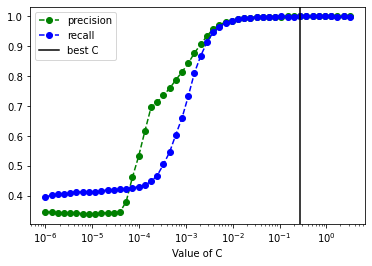

In [35]:
# plot to visualize ideal C

fig = plt.figure()
plt.plot(cs, mean_score[0], "o--", label="precision", color="green")
plt.plot(cs, mean_score[1], "o--", label="recall", color="blue")
plt.xscale("log")
plt.axis('tight')
plt.xlabel('Value of C')
plt.axvline(x=best_score[1], color='black', label='best C')

plt.legend()
plt.show()

Error mnimized: 0.0 at Trees = 4 with accuracy: 1.0


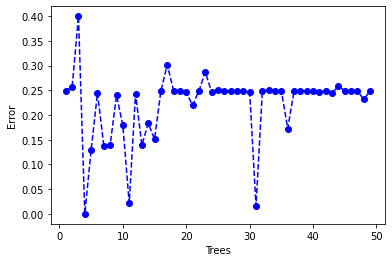

In [36]:
#Random forest Hyperparameter search (with max_depth = 2)
error = []
accuracy = []
for i in range(1,50):
    rf = RandomForestClassifier(n_estimators=i,max_depth=2)
    rf.fit(x_t,y_t)
    i_pred = rf.predict(x_t)
    error.append(np.mean(i_pred != y_t))
    accuracy.append(metrics.accuracy_score(y_t, i_pred))
    
plt.figure()
plt.plot(range(1,50), error, 'o--', color='blue')
plt.xlabel('Trees')
plt.ylabel('Error')

print("Error mnimized:", min(error),"at Trees =", error.index(min(error))+1, "with accuracy:", accuracy[error.index(min(error))])

Error minimized: 0.0 at Trees = 4 with accuracy: 1.0


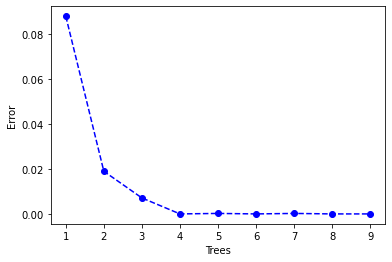

In [37]:
#Random forest Hyperparameter search (with max_depth = 10)
error = []
accuracy = []
for i in range(1,10):
    rf = RandomForestClassifier(n_estimators=i,max_depth=10)
    rf.fit(x_t,y_t)
    i_pred = rf.predict(x_t)
    error.append(np.mean(i_pred != y_t))
    accuracy.append(metrics.accuracy_score(y_t, i_pred))
    
plt.figure()
plt.plot(range(1,10), error, 'o--', color='blue')
plt.xlabel('Trees')
plt.ylabel('Error')

print("Error minimized:", min(error),"at Trees =", error.index(min(error))+1, "with accuracy:", accuracy[error.index(min(error))])